In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [3]:
# Set the Path for your training and test data ser
PATH = "/content/drive/MyDrive/Bangkit 2022 Capstone Stuff/Capstone_Eye_Diseases"
data_dir_list = os.listdir(PATH)
data_dir_list

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/drive/MyDrive/Bangkit 2022 Capstone Stuff/Capstone_Eye_Diseases'

In [ ]:
# Define the train and test base directories
train_dir = PATH + '/train'
validation_dir = PATH + '/test'

# Directory with training cataract pictures
train_cataract_dir = os.path.join(train_dir, 'cataract')
# Directory with training normal pictures
train_normal_dir = os.path.join(train_dir, 'normal')
# Directory with training conjunctivitis pictures
train_conjunctivitis_dir = os.path.join(train_dir, 'conjunctivitis')
# Directory with training ocular_herpes pictures
train_ocular_herpes_dir = os.path.join(train_dir, 'ocular_herpes')
# Directory with validation cataract pictures
validation_cataract_dir = os.path.join(validation_dir, 'cataract')
# Directory with validation normal pictures
validation_normal_dir = os.path.join(validation_dir, 'normal')
# Directory with validation conjunctivitis pictures
validation_conjunctivitis_dir = os.path.join(validation_dir, 'conjunctivitis')
# Directory with validation ocular_herpes pictures
validation_ocular_herpes_dir = os.path.join(validation_dir, 'ocular_herpes')

# Check the number of images for each class and set
print(f"There are {len(os.listdir(train_cataract_dir))} images of cataract for training.\n")
print(f"There are {len(os.listdir(train_normal_dir))} images of normal for training.\n")
print(f"There are {len(os.listdir(train_conjunctivitis_dir))} images of conjunctivitis for training.\n")
print(f"There are {len(os.listdir(train_ocular_herpes_dir))} images of ocular_herpes for training.\n")
print(f"There are {len(os.listdir(validation_cataract_dir))} images of cataract for validation.\n")
print(f"There are {len(os.listdir(validation_normal_dir))} images of normal for validation.\n")
print(f"There are {len(os.listdir(validation_conjunctivitis_dir))} images of conjunctivitis for validation.\n")
print(f"There are {len(os.listdir(validation_ocular_herpes_dir))} images of ocular_herpes for validation.\n")

There are 175 images of cataract for training.

There are 175 images of normal for training.

There are 175 images of conjunctivitis for training.

There are 175 images of ocular_herpes for training.

There are 25 images of cataract for validation.

There are 25 images of normal for validation.

There are 25 images of conjunctivitis for validation.

There are 25 images of ocular_herpes for validation.



Sample cataract image:


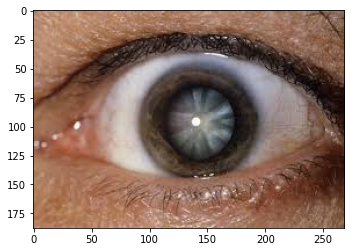


Sample normal image:


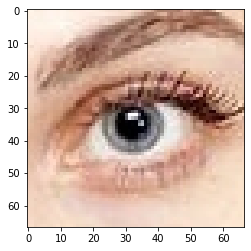


Sample conjunctivitis image:


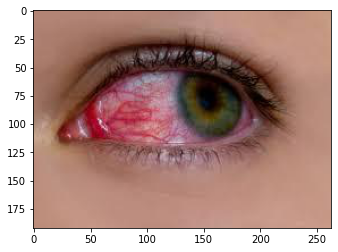


Sample ocular_herpes image:


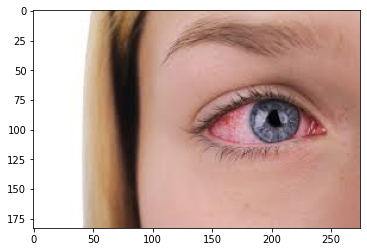

In [ ]:
print("Sample cataract image:")
plt.imshow(load_img(f"{os.path.join(train_cataract_dir, os.listdir(train_cataract_dir)[0])}"))
plt.show()

print("\nSample normal image:")
plt.imshow(load_img(f"{os.path.join(train_normal_dir, os.listdir(train_normal_dir)[0])}"))
plt.show()

print("\nSample conjunctivitis image:")
plt.imshow(load_img(f"{os.path.join(train_conjunctivitis_dir, os.listdir(train_conjunctivitis_dir)[0])}"))
plt.show()

print("\nSample ocular_herpes image:")
plt.imshow(load_img(f"{os.path.join(train_ocular_herpes_dir, os.listdir(train_ocular_herpes_dir)[0])}"))
plt.show()

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   horizontal_flip = True)
  
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=8, 
                                                      class_mode='categorical',
                                                      target_size=(150, 150))
  
  validation_datagen = ImageDataGenerator(rescale = 1./255.)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=8, 
                                                                class_mode='categorical',
                                                                target_size=(150, 150))
  
  return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = train_val_generators(train_dir, validation_dir)

Found 700 images belonging to 4 classes.
Found 100 images belonging to 4 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(optimizer = RMSprop(learning_rate=0.001), 
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [ ]:
# Define a Callback class that stops training once validation accuracy reaches 80%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.80):
      print("\nReached 80% validation accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 50,
                    verbose = 1,
                    callbacks=callbacks)

Epoch 1/50
88/88 [==============================] - 212s 2s/step - loss: 2.2642 - accuracy: 0.2500 - val_loss: 1.3827 - val_accuracy: 0.3100
Epoch 2/50
88/88 [==============================] - 144s 2s/step - loss: 1.4225 - accuracy: 0.3200 - val_loss: 1.3995 - val_accuracy: 0.3600
Epoch 3/50
88/88 [==============================] - 144s 2s/step - loss: 1.4129 - accuracy: 0.4029 - val_loss: 1.3053 - val_accuracy: 0.3200
Epoch 4/50
88/88 [==============================] - 138s 2s/step - loss: 1.3103 - accuracy: 0.4443 - val_loss: 2.9769 - val_accuracy: 0.3000
Epoch 5/50
88/88 [==============================] - 134s 2s/step - loss: 1.2534 - accuracy: 0.4729 - val_loss: 1.2889 - val_accuracy: 0.4500
Epoch 6/50
88/88 [==============================] - 137s 2s/step - loss: 1.2997 - accuracy: 0.4514 - val_loss: 3.5173 - val_accuracy: 0.2400
Epoch 7/50
88/88 [==============================] - 139s 2s/step - loss: 1.3891 - accuracy: 0.4629 - val_loss: 1.4272 - val_accuracy: 0.3400
Epoch 8/50
88

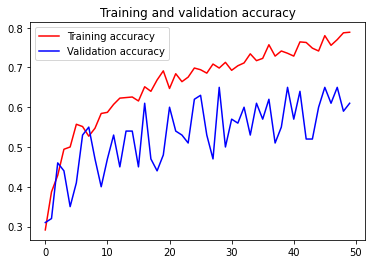

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the training and validation accuracies for each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
validation_generator.class_indices

{'cataract': 0, 'conjunctivitis': 1, 'normal': 2, 'ocular_herpes': 3}

Saving 123-rood-oog-conjunctiv-07-16s.jpg to 123-rood-oog-conjunctiv-07-16s (1).jpg
Saving 190052.jpg to 190052.jpg


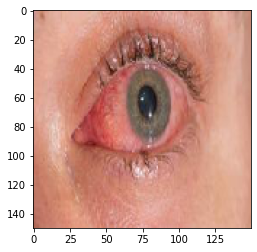

123-rood-oog-conjunctiv-07-16s.jpg
[[0.0000000e+00 2.7415662e-23 0.0000000e+00 1.0000000e+00]]


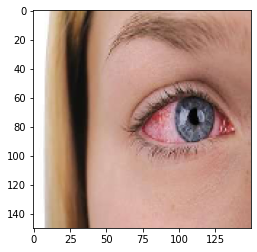

190052.jpg
[[0. 1. 0. 0.]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  plt.imshow(img)
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  print(classes)